In [ ]:
!unzip /content/EE559_Project-main_Final.zip


In [28]:
import pandas as pd 
import imblearn
import numpy as np 

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

fires_train = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_train.csv")
fires_test = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_test.csv")

data = fires_train.describe()
tstdata = fires_test.describe()

fires_train = fires_train.iloc[:,1:]
fires_test = fires_test.iloc[:,1:]

##Normalising the data as there is scale difference
predictors = fires_train.iloc[:,:-1]
target = fires_train.iloc[:,-1:]

predictorstst = fires_test.iloc[:,:-1]
targettst = fires_test.iloc[:,-1:]

scalar = MinMaxScaler()

fires = scalar.fit_transform(predictors)
firestst = scalar.fit_transform(predictorstst)

 #test Linear
model_linear = SVC(kernel = "linear")
model_linear.fit(fires,target)
pred_test_linear = model_linear.predict(firestst)

 #test RBF

# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(fires,target)
pred_test_rbf = model_rbf.predict(firestst)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
fires_train16 = pd.read_csv("/content/EE559_Project-main/datasets/firesfeatures.csv")
fires_test16 = pd.read_csv("/content/EE559_Project-main/datasets/fireststfeatures.csv")


scalar = MinMaxScaler()

fires16 = scalar.fit_transform(fires_train16)
firestst16 = scalar.fit_transform(fires_test16)

 #test Linear
model_linear = SVC(kernel = "linear")
model_linear.fit(fires16,target)
pred_test_linear = model_linear.predict(firestst16)

 #test RBF

# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(fires16,target)
pred_test_rbf = model_rbf.predict(firestst16)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Temperature' 'Ws' 'RH' 'Rain' 'FFMC' 'DMC' 'ISI' 'Temperature Ws'
 'Temperature RH' 'Ws RH' 'Ws FFMC' 'RH FFMC' 'Rain DMC' 'Rain DC'
 'Rain ISI' 'Rain BUI']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


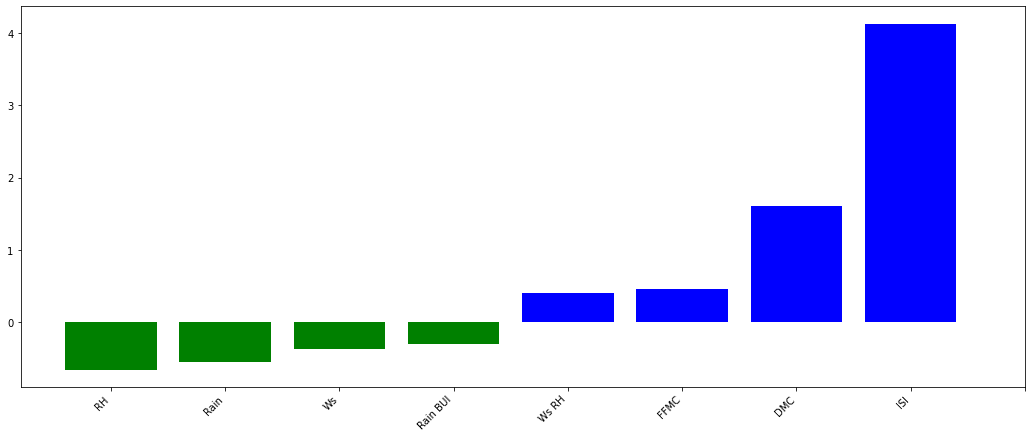

In [31]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=4):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(fires_train16.columns.values)

trainedsvm = svm.LinearSVC().fit(fires16, target)
feature_plot(trainedsvm, fires_train16.columns.values)

In [32]:
from sklearn.metrics import accuracy_score
q = accuracy_score(targettst,pred_test_rbf)
r = accuracy_score(targettst,pred_test_linear)
print( "Test RBF Accuracy=", q, "Test Linear Accuracy=", r)

Test RBF Accuracy= 0.7833333333333333 Test Linear Accuracy= 0.8166666666666667


Test F1_score= 0.8070175438596492 Test Accuracy= 0.8166666666666667


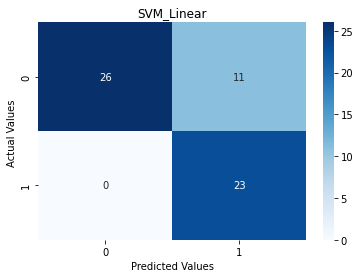

In [33]:
F1_score, Accuracy = metrics(targettst,pred_test_linear, "SVM_Linear")
print("Test F1_score=", F1_score, "Test Accuracy=", Accuracy)

Test RBF F1_score= 0.7547169811320754 Test RBF Accuracy= 0.7833333333333333


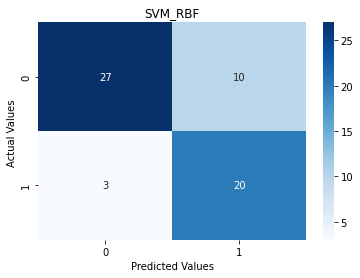

In [25]:
F1_score, Accuracy = metrics(targettst,pred_test_rbf, "SVM_RBF")
print("Test RBF F1_score=", F1_score, "Test RBF Accuracy=", Accuracy)